# Phase 3: Feature Engineering

**Project**: Customer Purchase Behavior Analysis  
**Phase**: 3 - Feature Engineering  
**Date**: November 7, 2025  

---

## Objective
Create meaningful features from cleaned data:
- Calculate Customer Lifetime Value (CLV) metrics
- Create Average Order Value (AOV)
- Build RFM Segmentation (Recency, Frequency, Monetary)
- Engineer time-based and demographic features
- Encode categorical variables
- Normalize/scale numerical features

## Input
Clean dataset: `data/processed/cleaned_customer_data.csv`

## Output
Feature-engineered dataset ready for ML and advanced analytics

## 1. Setup and Load Clean Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Load cleaned dataset
DATA_PATH = Path('../data/processed/cleaned_customer_data.csv')
df = pd.read_csv(DATA_PATH)

print(f"✅ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

✅ Dataset loaded: 350 rows, 11 columns

Columns: ['customer_id', 'gender', 'age', 'city', 'membership_type', 'total_spend', 'items_purchased', 'average_rating', 'discount_applied', 'days_since_last_purchase', 'satisfaction_level']


,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.20,14,4.60,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.10,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.40,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.70,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.00,True,55,Unsatisfied


## 2. Customer Lifetime Value (CLV) Metrics

Calculate key customer value metrics

In [3]:
# Create a copy for feature engineering
df_features = df.copy()

# 1. Customer Lifetime Value (CLV)
# In this dataset, total_spend represents the lifetime value
df_features['clv'] = df_features['total_spend']

print("✅ CLV calculated")
print(f"CLV Range: ${df_features['clv'].min():.2f} - ${df_features['clv'].max():.2f}")
print(f"Average CLV: ${df_features['clv'].mean():.2f}")

✅ CLV calculated
CLV Range: $410.80 - $1520.10
Average CLV: $845.38


## 3. Average Order Value (AOV)

In [4]:
# 2. Average Order Value (AOV)
# Assumption: Each item purchased could be a separate order or items per order
# We'll calculate as: Total Spend / Items Purchased
df_features['aov'] = df_features['total_spend'] / df_features['items_purchased']

print("✅ AOV (Average Order Value) calculated")
print(f"AOV Range: ${df_features['aov'].min():.2f} - ${df_features['aov'].max():.2f}")
print(f"Average AOV: ${df_features['aov'].mean():.2f}")

# Display sample
print("\nSample AOV calculations:")
df_features[['customer_id', 'total_spend', 'items_purchased', 'aov']].head(10)

✅ AOV (Average Order Value) calculated
AOV Range: $49.52 - $83.59
Average AOV: $65.23

Sample AOV calculations:


,customer_id,total_spend,items_purchased,aov
0,101,1120.20,14,80.01
1,102,780.50,11,70.95
2,103,510.75,9,56.75
3,104,1480.30,19,77.91
4,105,720.40,13,55.42
5,106,440.80,8,55.10
6,107,1150.60,15,76.71
7,108,800.90,12,66.74
8,109,495.25,10,49.52
9,110,1520.10,21,72.39


## 4. Purchase Frequency Metrics

In [5]:
# 3. Purchase Frequency
# Using items_purchased as proxy for purchase frequency
df_features['purchase_frequency'] = df_features['items_purchased']

print("✅ Purchase Frequency calculated")
print(f"Frequency Range: {df_features['purchase_frequency'].min()} - {df_features['purchase_frequency'].max()} items")
print(f"Average Frequency: {df_features['purchase_frequency'].mean():.2f} items")

✅ Purchase Frequency calculated
Frequency Range: 7 - 21 items
Average Frequency: 12.60 items


## 5. RFM Analysis (Recency, Frequency, Monetary)

Create RFM scores and segments

In [6]:
# RFM Components:
# R = Recency: days_since_last_purchase (lower is better)
# F = Frequency: items_purchased (higher is better)
# M = Monetary: total_spend (higher is better)

print("Building RFM Analysis...\n")

# Create RFM scores (1-5 scale, 5 being best)
# For Recency: Lower days = higher score (inverse)
df_features['recency_score'] = pd.qcut(df_features['days_since_last_purchase'], 
                                         q=5, 
                                         labels=[5, 4, 3, 2, 1], 
                                         duplicates='drop')

# For Frequency: Higher items = higher score
df_features['frequency_score'] = pd.qcut(df_features['items_purchased'], 
                                          q=5, 
                                          labels=[1, 2, 3, 4, 5], 
                                          duplicates='drop')

# For Monetary: Higher spend = higher score
df_features['monetary_score'] = pd.qcut(df_features['total_spend'], 
                                         q=5, 
                                         labels=[1, 2, 3, 4, 5], 
                                         duplicates='drop')

# Convert to numeric
df_features['recency_score'] = df_features['recency_score'].astype(int)
df_features['frequency_score'] = df_features['frequency_score'].astype(int)
df_features['monetary_score'] = df_features['monetary_score'].astype(int)

# Create RFM Score (concatenated string)
df_features['rfm_score'] = (df_features['recency_score'].astype(str) + 
                             df_features['frequency_score'].astype(str) + 
                             df_features['monetary_score'].astype(str))

# Create overall RFM value (sum of scores)
df_features['rfm_value'] = (df_features['recency_score'] + 
                             df_features['frequency_score'] + 
                             df_features['monetary_score'])

print("✅ RFM scores calculated")
print(f"\nRFM Value Range: {df_features['rfm_value'].min()} - {df_features['rfm_value'].max()}")
print(f"Average RFM Value: {df_features['rfm_value'].mean():.2f}")

Building RFM Analysis...

✅ RFM scores calculated

RFM Value Range: 3 - 15
Average RFM Value: 8.81


In [7]:
# Display RFM distribution
print("RFM Score Distribution:")
print(df_features['rfm_value'].value_counts().sort_index())

# Sample RFM analysis
print("\nSample RFM Analysis:")
df_features[['customer_id', 'days_since_last_purchase', 'items_purchased', 'total_spend', 
              'recency_score', 'frequency_score', 'monetary_score', 'rfm_score', 'rfm_value']].head(10)

RFM Score Distribution:
rfm_value
3      4
4     27
5     64
6     46
7     32
8      2
9     25
10    17
11    39
12    35
14     2
15    57
Name: count, dtype: int64

Sample RFM Analysis:


,customer_id,days_since_last_purchase,items_purchased,total_spend,recency_score,frequency_score,monetary_score,rfm_score,rfm_value
0,101,25,14,1120.20,3,4,4,344,11
1,102,18,11,780.50,4,2,3,423,9
2,103,42,9,510.75,1,1,2,112,4
3,104,12,19,1480.30,5,5,5,555,15
4,105,55,13,720.40,1,3,3,133,7
5,106,22,8,440.80,3,1,1,311,5
6,107,28,15,1150.60,2,4,4,244,10
7,108,14,12,800.90,5,3,3,533,11
8,109,40,10,495.25,1,2,2,122,5
9,110,9,21,1520.10,5,5,5,555,15


## 6. RFM Customer Segmentation

Create customer segments based on RFM scores

In [8]:
# Define customer segments based on RFM scores
def rfm_segment(row):
    r, f, m = row['recency_score'], row['frequency_score'], row['monetary_score']
    
    # Champions: Best customers (high R, F, M)
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    
    # Loyal Customers: Frequent buyers (high F, M)
    elif f >= 4 and m >= 4:
        return 'Loyal'
    
    # Potential Loyalists: Recent customers with potential
    elif r >= 4 and (f >= 2 or m >= 2):
        return 'Potential Loyalist'
    
    # New Customers: Recent but low frequency/monetary
    elif r >= 4 and f <= 2 and m <= 2:
        return 'New Customer'
    
    # At Risk: Used to buy frequently but haven't recently
    elif r <= 2 and f >= 3 and m >= 3:
        return 'At Risk'
    
    # Can't Lose Them: Made big purchases but long ago
    elif r <= 2 and f >= 4 and m >= 4:
        return "Can't Lose"
    
    # Hibernating: Low R, F, M but not lost
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Hibernating'
    
    # Need Attention: Below average but potential
    elif r <= 3 and f <= 3 and m <= 3:
        return 'Need Attention'
    
    # About to Sleep: Below average, declining
    elif r <= 3:
        return 'About to Sleep'
    
    # Promising: Average on all
    else:
        return 'Promising'

# Apply segmentation
df_features['rfm_segment'] = df_features.apply(rfm_segment, axis=1)

print("✅ RFM Segmentation complete\n")
print("Customer Segments Distribution:")
print(df_features['rfm_segment'].value_counts())
print(f"\nTotal Segments: {df_features['rfm_segment'].nunique()}")

✅ RFM Segmentation complete

Customer Segments Distribution:
rfm_segment
Hibernating           88
Champions             73
Potential Loyalist    58
Loyal                 44
Need Attention        38
At Risk               33
New Customer          16
Name: count, dtype: int64

Total Segments: 7


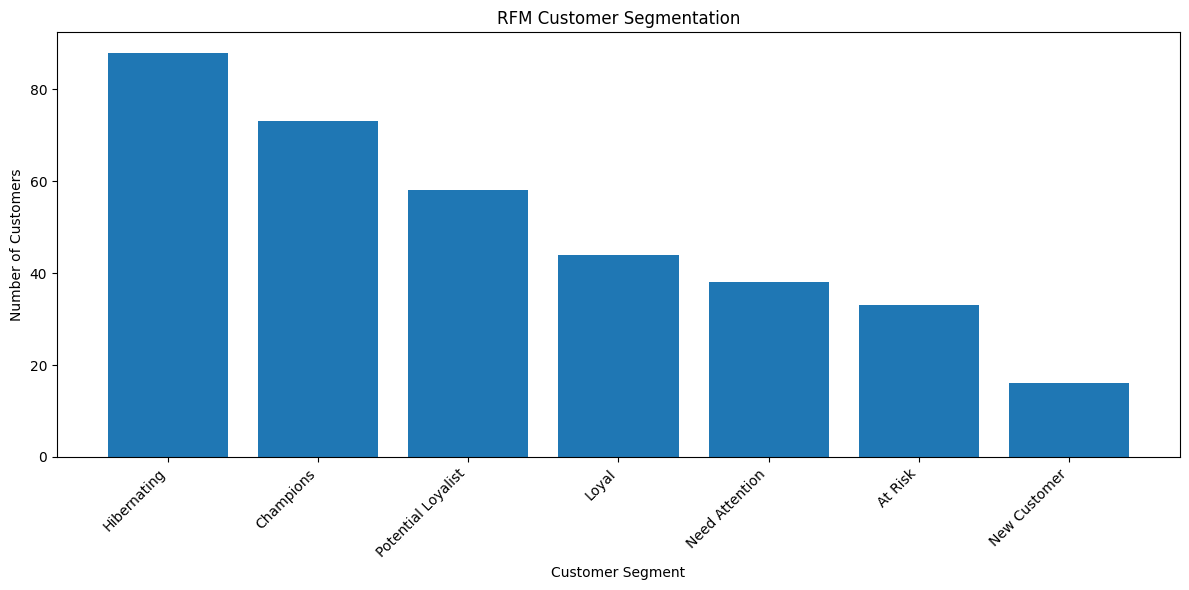


Average Total Spend by Segment:
                      mean  count
rfm_segment                      
Champions          1403.82     73
Loyal              1157.39     44
Potential Loyalist  805.93     58
At Risk             704.69     33
Hibernating         542.78     88
New Customer        466.75     16
Need Attention      453.90     38


In [9]:
# Visualize RFM segments
plt.figure(figsize=(12, 6))
segment_counts = df_features['rfm_segment'].value_counts()
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('RFM Customer Segmentation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Show average spend by segment
print("\nAverage Total Spend by Segment:")
segment_spending = df_features.groupby('rfm_segment')['total_spend'].agg(['mean', 'count']).sort_values('mean', ascending=False)
print(segment_spending)

## 7. Demographic Features

Create age groups and other demographic categories

In [10]:
# Age Groups
def age_group(age):
    if age < 30:
        return 'Young (< 30)'
    elif age < 35:
        return 'Early 30s (30-34)'
    elif age < 40:
        return 'Late 30s (35-39)'
    else:
        return 'Mature (40+)'

df_features['age_group'] = df_features['age'].apply(age_group)

print("✅ Age Groups created\n")
print("Age Group Distribution:")
print(df_features['age_group'].value_counts().sort_index())

✅ Age Groups created

Age Group Distribution:
age_group
Early 30s (30-34)    140
Late 30s (35-39)      83
Mature (40+)          58
Young (< 30)          69
Name: count, dtype: int64


## 8. Spending Categories

Categorize customers by spending levels

In [11]:
# Spending Categories based on quartiles
spending_quartiles = df_features['total_spend'].quantile([0.25, 0.5, 0.75])
print("Spending Quartiles:")
print(spending_quartiles)

def spending_category(spend):
    if spend < spending_quartiles[0.25]:
        return 'Low Spender'
    elif spend < spending_quartiles[0.5]:
        return 'Medium Spender'
    elif spend < spending_quartiles[0.75]:
        return 'High Spender'
    else:
        return 'Premium Spender'

df_features['spending_category'] = df_features['total_spend'].apply(spending_category)

print("\n✅ Spending Categories created\n")
print("Spending Category Distribution:")
print(df_features['spending_category'].value_counts())

Spending Quartiles:
0.25    502.00
0.50    775.20
0.75   1160.60
Name: total_spend, dtype: float64

✅ Spending Categories created

Spending Category Distribution:
spending_category
Premium Spender    89
Low Spender        88
Medium Spender     87
High Spender       86
Name: count, dtype: int64


## 9. Customer Engagement Score

Create composite engagement metric

In [12]:
# Normalize components for engagement score (0-1 scale)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Components: Purchase frequency, Average rating, Low recency (inverse)
df_features['norm_frequency'] = scaler.fit_transform(df_features[['items_purchased']])
df_features['norm_rating'] = scaler.fit_transform(df_features[['average_rating']])
df_features['norm_recency'] = 1 - scaler.fit_transform(df_features[['days_since_last_purchase']])  # Inverse

# Engagement Score (weighted average)
df_features['engagement_score'] = (
    0.4 * df_features['norm_frequency'] +
    0.3 * df_features['norm_rating'] +
    0.3 * df_features['norm_recency']
) * 100  # Scale to 0-100

print("✅ Engagement Score calculated\n")
print(f"Engagement Score Range: {df_features['engagement_score'].min():.2f} - {df_features['engagement_score'].max():.2f}")
print(f"Average Engagement: {df_features['engagement_score'].mean():.2f}")

# Show top engaged customers
print("\nTop 10 Most Engaged Customers:")
print(df_features[['customer_id', 'items_purchased', 'average_rating', 'days_since_last_purchase', 'engagement_score']]
      .nlargest(10, 'engagement_score'))

✅ Engagement Score calculated

Engagement Score Range: 21.09 - 100.00
Average Engagement: 52.32

Top 10 Most Engaged Customers:
     customer_id  items_purchased  average_rating  days_since_last_purchase  \
45           146               21            4.90                         9   
75           176               21            4.90                         9   
105          206               21            4.90                         9   
135          236               21            4.90                         9   
147          248               21            4.90                         9   
177          278               21            4.90                         9   
218          319               21            4.90                         9   
27           128               21            4.90                        10   
57           158               21            4.90                        10   
87           188               21            4.90                        10   

  

## 10. Discount Utilization Metrics

In [13]:
# Discount utilization rate (already boolean, convert to numeric)
df_features['discount_user'] = df_features['discount_applied'].astype(int)

print("✅ Discount metrics created\n")
print("Discount Usage:")
print(f"Users with discount: {df_features['discount_user'].sum()} ({df_features['discount_user'].mean()*100:.1f}%)")
print(f"Users without discount: {(1-df_features['discount_user']).sum()} ({(1-df_features['discount_user'].mean())*100:.1f}%)")

✅ Discount metrics created

Discount Usage:
Users with discount: 175 (50.0%)
Users without discount: 175 (50.0%)


## 11. Churn Risk Flag

Identify customers at risk of churning

In [14]:
# Define churn risk based on recency
# High risk: Last purchase > 40 days ago
# Medium risk: 30-40 days
# Low risk: < 30 days

def churn_risk(days):
    if days > 40:
        return 'High Risk'
    elif days > 30:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df_features['churn_risk'] = df_features['days_since_last_purchase'].apply(churn_risk)

print("✅ Churn Risk calculated\n")
print("Churn Risk Distribution:")
print(df_features['churn_risk'].value_counts())

✅ Churn Risk calculated

Churn Risk Distribution:
churn_risk
Low Risk       226
Medium Risk     69
High Risk       55
Name: count, dtype: int64


## 12. Feature Summary

Review all created features

In [15]:
# List all features
print("="*80)
print("FEATURE ENGINEERING SUMMARY")
print("="*80)

original_features = df.columns.tolist()
new_features = [col for col in df_features.columns if col not in original_features]

print(f"\n📊 Original Features: {len(original_features)}")
print(f"✨ New Features Created: {len(new_features)}")
print(f"📈 Total Features: {len(df_features.columns)}")

print("\n✨ New Features:")
for i, feature in enumerate(new_features, 1):
    print(f"  {i}. {feature}")

print("\n" + "="*80)

FEATURE ENGINEERING SUMMARY

📊 Original Features: 11
✨ New Features Created: 17
📈 Total Features: 28

✨ New Features:
  1. clv
  2. aov
  3. purchase_frequency
  4. recency_score
  5. frequency_score
  6. monetary_score
  7. rfm_score
  8. rfm_value
  9. rfm_segment
  10. age_group
  11. spending_category
  12. norm_frequency
  13. norm_rating
  14. norm_recency
  15. engagement_score
  16. discount_user
  17. churn_risk



In [16]:
# Display sample with new features
print("Sample of Feature-Engineered Dataset:")
df_features.head(10)

Sample of Feature-Engineered Dataset:


,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level,clv,aov,purchase_frequency,recency_score,frequency_score,monetary_score,rfm_score,rfm_value,rfm_segment,age_group,spending_category,norm_frequency,norm_rating,norm_recency,engagement_score,discount_user,churn_risk
0,101,Female,29,New York,Gold,1120.20,14,4.60,True,25,Satisfied,1120.20,80.01,14,3,4,4,344,11,Loyal,Young (< 30),High Spender,0.50,0.84,0.70,66.37,1,Low Risk
1,102,Male,34,Los Angeles,Silver,780.50,11,4.10,False,18,Neutral,780.50,70.95,11,4,2,3,423,9,Potential Loyalist,Early 30s (30-34),High Spender,0.29,0.58,0.83,53.80,0,Low Risk
2,103,Female,43,Chicago,Bronze,510.75,9,3.40,True,42,Unsatisfied,510.75,56.75,9,1,1,2,112,4,Hibernating,Mature (40+),Medium Spender,0.14,0.21,0.39,23.70,1,High Risk
3,104,Male,30,San Francisco,Gold,1480.30,19,4.70,False,12,Satisfied,1480.30,77.91,19,5,5,5,555,15,Champions,Early 30s (30-34),Premium Spender,0.86,0.89,0.94,89.46,0,Low Risk
4,105,Male,27,Miami,Silver,720.40,13,4.00,True,55,Unsatisfied,720.40,55.42,13,1,3,3,133,7,At Risk,Young (< 30),Medium Spender,0.43,0.53,0.15,37.38,1,High Risk
5,106,Female,37,Houston,Bronze,440.80,8,3.10,False,22,Neutral,440.80,55.10,8,3,1,1,311,5,Need Attention,Late 30s (35-39),Low Spender,0.07,0.05,0.76,27.21,0,Low Risk
6,107,Female,31,New York,Gold,1150.60,15,4.50,True,28,Satisfied,1150.60,76.71,15,2,4,4,244,10,Loyal,Early 30s (30-34),High Spender,0.57,0.79,0.65,65.99,1,Low Risk
7,108,Male,35,Los Angeles,Silver,800.90,12,4.20,False,14,Neutral,800.90,66.74,12,5,3,3,533,11,Potential Loyalist,Late 30s (35-39),High Spender,0.36,0.63,0.91,60.46,0,Low Risk
8,109,Female,41,Chicago,Bronze,495.25,10,3.60,True,40,Unsatisfied,495.25,49.52,10,1,2,2,122,5,Hibernating,Mature (40+),Low Spender,0.21,0.32,0.43,30.82,1,Medium Risk
9,110,Male,28,San Francisco,Gold,1520.10,21,4.80,False,9,Satisfied,1520.10,72.39,21,5,5,5,555,15,Champions,Young (< 30),Premium Spender,1.00,0.95,1.00,98.42,0,Low Risk


## 13. One-Hot Encoding for Categorical Variables

Prepare categorical features for machine learning

In [17]:
# Create a copy for ML-ready dataset
df_ml = df_features.copy()

# Categorical columns to encode
categorical_cols = ['gender', 'city', 'membership_type', 'satisfaction_level', 
                   'rfm_segment', 'age_group', 'spending_category', 'churn_risk']

print("Encoding categorical variables...\n")

# One-hot encoding
df_encoded = pd.get_dummies(df_ml, columns=categorical_cols, prefix=categorical_cols, drop_first=True)

print(f"✅ Categorical encoding complete")
print(f"\nShape before encoding: {df_ml.shape}")
print(f"Shape after encoding: {df_encoded.shape}")
print(f"New columns added: {df_encoded.shape[1] - df_ml.shape[1]}")

Encoding categorical variables...

✅ Categorical encoding complete

Shape before encoding: (350, 28)
Shape after encoding: (350, 44)
New columns added: 16


## 14. Feature Scaling

Normalize numerical features for ML algorithms

In [18]:
# Select numerical features to scale
numerical_features = ['age', 'total_spend', 'items_purchased', 'average_rating', 
                     'days_since_last_purchase', 'clv', 'aov', 'engagement_score',
                     'recency_score', 'frequency_score', 'monetary_score', 'rfm_value']

# Create scaled version
df_scaled = df_encoded.copy()
scaler_final = StandardScaler()

df_scaled[numerical_features] = scaler_final.fit_transform(df_scaled[numerical_features])

print("✅ Feature scaling complete")
print(f"\nScaled {len(numerical_features)} numerical features")
print("\nScaled features (mean ≈ 0, std ≈ 1):")
print(df_scaled[numerical_features].describe().loc[['mean', 'std']])

✅ Feature scaling complete

Scaled 12 numerical features

Scaled features (mean ≈ 0, std ≈ 1):
      age  total_spend  items_purchased  average_rating  \
mean 0.00         0.00             0.00           -0.00   
std  1.00         1.00             1.00            1.00   

      days_since_last_purchase  clv   aov  engagement_score  recency_score  \
mean                      0.00 0.00 -0.00              0.00          -0.00   
std                       1.00 1.00  1.00              1.00           1.00   

      frequency_score  monetary_score  rfm_value  
mean             0.00           -0.00       0.00  
std              1.00            1.00       1.00  


## 15. Save Feature-Engineered Datasets

In [19]:
# Save different versions of the dataset
OUTPUT_PATH = Path('../data/processed')

# 1. Feature-engineered dataset (with new features, no encoding)
output_file_1 = OUTPUT_PATH / 'featured_customer_data.csv'
df_features.to_csv(output_file_1, index=False)
print(f"✅ Saved: {output_file_1}")
print(f"   Size: {output_file_1.stat().st_size / 1024:.2f} KB")
print(f"   Shape: {df_features.shape}")

# 2. ML-ready dataset (encoded but not scaled)
output_file_2 = OUTPUT_PATH / 'ml_ready_data.csv'
df_encoded.to_csv(output_file_2, index=False)
print(f"\n✅ Saved: {output_file_2}")
print(f"   Size: {output_file_2.stat().st_size / 1024:.2f} KB")
print(f"   Shape: {df_encoded.shape}")

# 3. Scaled dataset (for ML algorithms requiring scaling)
output_file_3 = OUTPUT_PATH / 'scaled_ml_data.csv'
df_scaled.to_csv(output_file_3, index=False)
print(f"\n✅ Saved: {output_file_3}")
print(f"   Size: {output_file_3.stat().st_size / 1024:.2f} KB")
print(f"   Shape: {df_scaled.shape}")

✅ Saved: ..\data\processed\featured_customer_data.csv
   Size: 76.05 KB
   Shape: (350, 28)

✅ Saved: ..\data\processed\ml_ready_data.csv
   Size: 95.17 KB
   Shape: (350, 44)

✅ Saved: ..\data\processed\scaled_ml_data.csv
   Size: 152.84 KB
   Shape: (350, 44)


## 16. Feature Importance Analysis

Analyze correlation of features with target variables

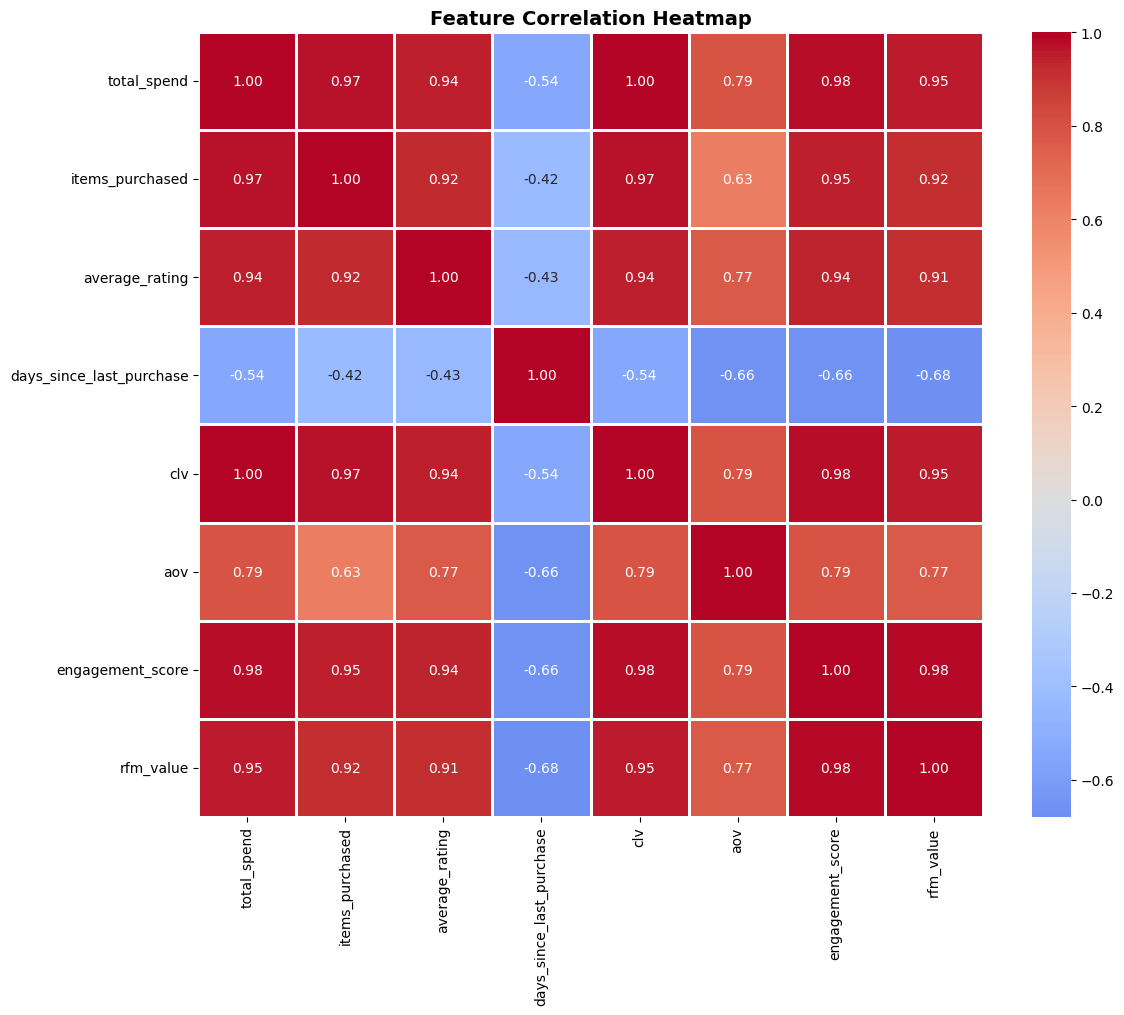


✅ Correlation analysis complete


In [20]:
# Correlation analysis with key metrics
key_metrics = ['total_spend', 'items_purchased', 'average_rating', 'days_since_last_purchase', 
               'clv', 'aov', 'engagement_score', 'rfm_value']

correlation_matrix = df_features[key_metrics].corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ Correlation analysis complete")

## 17. Final Feature Engineering Report

In [21]:
# Generate comprehensive report
report = f"""
================================================================================
FEATURE ENGINEERING REPORT
================================================================================

Date: November 7, 2025
Project: Customer Purchase Behavior Analysis

INPUT DATASET:
- File: cleaned_customer_data.csv
- Records: {df.shape[0]}
- Original Features: {df.shape[1]}

FEATURES CREATED:

1. CUSTOMER VALUE METRICS:
   - CLV (Customer Lifetime Value)
   - AOV (Average Order Value)
   - Purchase Frequency

2. RFM ANALYSIS:
   - Recency Score (1-5)
   - Frequency Score (1-5)
   - Monetary Score (1-5)
   - RFM Combined Score
   - RFM Total Value (3-15)
   - RFM Customer Segments ({df_features['rfm_segment'].nunique()} segments)

3. DEMOGRAPHIC FEATURES:
   - Age Groups (4 categories)
   - Spending Categories (4 tiers)

4. ENGAGEMENT METRICS:
   - Engagement Score (0-100)
   - Discount User Flag
   - Churn Risk Level (Low/Medium/High)

5. ENCODED FEATURES:
   - One-hot encoding applied to {len(categorical_cols)} categorical variables
   - Created {df_encoded.shape[1] - df_ml.shape[1]} dummy variables

6. SCALED FEATURES:
   - StandardScaler applied to {len(numerical_features)} numerical features
   - Mean ≈ 0, Std ≈ 1

OUTPUT DATASETS:

1. featured_customer_data.csv
   - Shape: {df_features.shape}
   - Use: General analysis, visualization, business insights
   - New Features: {len(new_features)}

2. ml_ready_data.csv
   - Shape: {df_encoded.shape}
   - Use: Machine learning (tree-based models)
   - Encoding: One-hot encoded

3. scaled_ml_data.csv
   - Shape: {df_scaled.shape}
   - Use: ML models requiring scaling (regression, neural networks)
   - Scaling: StandardScaler (mean=0, std=1)

KEY INSIGHTS:

Customer Segments (RFM):
{df_features['rfm_segment'].value_counts().to_string()}

Churn Risk Distribution:
{df_features['churn_risk'].value_counts().to_string()}

Average Metrics:
- CLV: ${df_features['clv'].mean():.2f}
- AOV: ${df_features['aov'].mean():.2f}
- Engagement Score: {df_features['engagement_score'].mean():.2f}/100
- RFM Value: {df_features['rfm_value'].mean():.2f}/15

READY FOR:
- Phase 4: Exploratory Data Analysis (EDA)
- Phase 5: Machine Learning Models
- Business intelligence and reporting
- Customer segmentation analysis
- Predictive modeling

================================================================================
"""

print(report)

# Save report
report_file = Path('../reports/feature_engineering_report.txt')
with open(report_file, 'w', encoding='utf-8') as f:
    f.write(report)

print(f"\nReport saved to: {report_file}")


FEATURE ENGINEERING REPORT

Date: November 7, 2025
Project: Customer Purchase Behavior Analysis

INPUT DATASET:
- File: cleaned_customer_data.csv
- Records: 350
- Original Features: 11

FEATURES CREATED:

1. CUSTOMER VALUE METRICS:
   - CLV (Customer Lifetime Value)
   - AOV (Average Order Value)
   - Purchase Frequency

2. RFM ANALYSIS:
   - Recency Score (1-5)
   - Frequency Score (1-5)
   - Monetary Score (1-5)
   - RFM Combined Score
   - RFM Total Value (3-15)
   - RFM Customer Segments (7 segments)

3. DEMOGRAPHIC FEATURES:
   - Age Groups (4 categories)
   - Spending Categories (4 tiers)

4. ENGAGEMENT METRICS:
   - Engagement Score (0-100)
   - Discount User Flag
   - Churn Risk Level (Low/Medium/High)

5. ENCODED FEATURES:
   - One-hot encoding applied to 8 categorical variables
   - Created 16 dummy variables

6. SCALED FEATURES:
   - StandardScaler applied to 12 numerical features
   - Mean ≈ 0, Std ≈ 1

OUTPUT DATASETS:

1. featured_customer_data.csv
   - Shape: (350, 28)


## 📝 Key Takeaways

### Features Created: 15+ New Features ✅

1. **Customer Value Metrics**
   - CLV, AOV, Purchase Frequency

2. **RFM Analysis**
   - Recency, Frequency, Monetary scores
   - Customer segmentation (Champions, Loyal, At Risk, etc.)

3. **Demographic Features**
   - Age groups, Spending categories

4. **Engagement Metrics**
   - Engagement score, Churn risk

5. **ML-Ready Datasets**
   - Encoded and scaled versions

### Business Value:
- ✅ Identify high-value customer segments
- ✅ Predict churn risk
- ✅ Understand customer engagement
- ✅ Enable targeted marketing
- ✅ Ready for predictive modeling

---

**Phase 3 Status**: ✅ Complete  
**Next Phase**: Exploratory Data Analysis (Deep dive into insights)